<font size = "+3"><b>fantabeto</b></size>

Fantacalcio Bayesian Estimated Team's Outcome

<i>Machine learning model for predicting Serie A players performance in a match, in terms of Fantacalcio (italian fantasy football) scores.</i>

The aim of this project is to predict Fantacalcio (Serie A fantasy football) player performances (vote and fantavote, respectively their match rating and that summed to the bonus/malus given by goals, assists and cards), using players and teams data from http://fantacalcio.it and http://fbref.com.

"outputs" folder contains predictions for the next Serie A matchdays, and an excel file for analysis. A list of players can be inserted to help selecting an optimal line-up.

![png](README_files/team_predictions.png)

Two neural network models are trained for predicting vote and fantavote for outfield players and goalkeepers, for which the clean sheet probability is also an output. 
The outputs of these models are not raw predictions, but probability distributions, in the form of SinhArcsinh, which is a skewed distribution, meaning that the probability density is asymmetric.
For predicting clean sheet probability, a Bernoulli distribution is instead used (a sample of which would be clean sheet = 1, with a given probability p, or clean sheet = 0 with probability 1-p)

See the following code and plot to show an example of vote and fantavote probability distributions. 
In this case, the player would be an attacking one, whose fantavote distribution is very skewed to the right (it is very more probable to score a goal and receive a 10 = 7+3 fantavote, than having an awful performance with a 4 fantavote!).

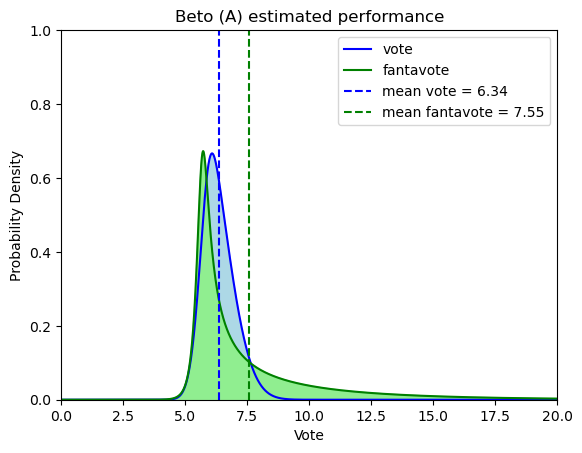

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sinh_archsinh_pdf(x, mu, sigma, eps, delta):
    mul = 2 / np.sinh( np.arcsinh(2) * delta)    
    z = (x - mu) / (sigma*mul)            
    S = np.sinh( -eps + (1/delta) * np.arcsinh(z))
    return np.exp(-0.5 * S * S) * np.sqrt(1 + S * S) / ( sigma * mul * delta ) / np.sqrt(1 + z * z) / np.sqrt(2 * np.pi)

x = np.arange(start = 0, stop = 30, step = 0.001)
pxv = sinh_archsinh_pdf(x, 6.06, 0.62, 0.33, 1.06)
pxf = sinh_archsinh_pdf(x, 5.6657, 1.224146, 0.795868, 1.9983)
plt.plot(x, pxv, label = 'vote', color = 'b')
plt.plot(x, pxf, label = 'fantavote', color = 'g')
plt.fill_between(x, pxv, color = 'lightblue')
plt.fill_between(x, pxf, color = 'lightgreen')
mv = np.average(x, weights = pxv)
mf = np.average(x, weights = pxf)
plt.vlines(x = mv, color = 'b', ymin = 0, ymax = 3, linestyle = 'dashed', label = 'mean vote = ' + '{:.2f}'.format(mv))
plt.vlines(x = mf, color = 'g', ymin = 0, ymax = 3, linestyle = 'dashed', label = 'mean fantavote = ' + '{:.2f}'.format(mf))
plt.legend()
plt.xlim([0, 20])
plt.ylim([0, 1])
plt.ylabel('Probability Density')
plt.xlabel('Vote')
plt.title('Beto (A) estimated performance')
plt.show()


There is code also for computing the expected points outcome of a particular line-up, by sampling multiple times from the players' points distribution and considering bonus for Defense Modifier ("Modificatore") and Clean Sheet. This leads to estimating the team's points probability distribution.

![png](README_files/lineup_prediction.png)

Credits:

http://Fantacalcio.it  - The game! And of course, a lot of data, including votes, players list and probable line-ups.

http://FBRef.com - Plenty of stats for football players and teams.

https://github.com/amiles2233/ff_prob - Inspiration, for using Tensorflow Probability and Bayesian Neural Networks for this task.

https://github.com/parth1902/Scrape-FBref-data - FBref data scraping code.

#fantacalcio #fantasy-football #serie-a

#machine-learning #ai #neural-networks

#python #tensorflow #tensorflow-probability